In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MachineLearning-Data.xlsx"
df = pd.read_excel(filepath)

#drop one of the useless column.
df =  df.drop(columns=['DA concentration'])

#assign feature and target variables and display the rows of the dataframe.
X = df.drop('DA Concentration (uM)', axis=1) 
y = df['DA Concentration (uM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
#let's define our artificial neural network model
def ANN_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_test_scaled.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

#compile the model and print the summary
model = ANN_model()
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

c:\Users\Admin\.conda\envs\DataCamp\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 281.7199 - val_loss: 3540.0735
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 249.1579 - val_loss: 3576.2007
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 246.0601 - val_loss: 3537.9968
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 294.5557 - val_loss: 3522.1689
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 225.4628 - val_loss: 3462.9575
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 272.6609 - val_loss: 3446.6658
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 231.4906 - val_loss: 3473.3022
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 297.6519 - val_loss: 3461.2437
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 241.8044 - val_loss: 3413.1265
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 259.4240 - val_loss: 3278.2480
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 185.2760 - val_loss: 3336.2280
Epoch 12/70
4/4 ━━━━━━━━━━━━━

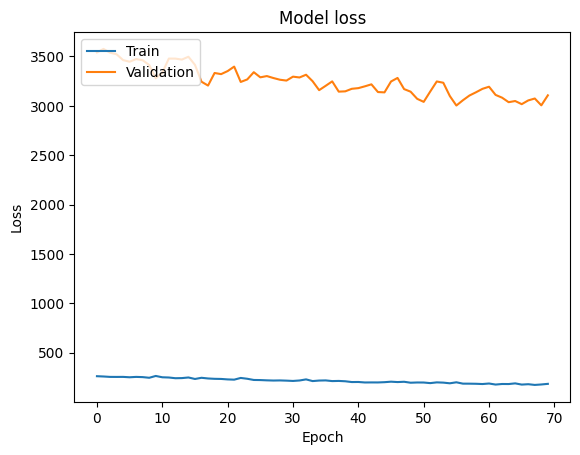

In [8]:
#train the model and plot the training history as training progresses
history = model.fit(X_train_scaled, y_train, epochs=70, batch_size=8, validation_split=0.2, verbose=1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
#predict the target variable using the test set
y_pred = model.predict(X_test_scaled)
#show predictions vs actual values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
    Actual   Predicted
13       0   -1.011435
39     200  171.881866
30      75   76.845352
45      30   40.326656
17      10   14.822227
48      30   80.182945
26      50   38.618591
25      50   44.036297
32     100  105.034859
19      20   18.609058


In [11]:
mse_ann = mean_squared_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

# Output performance metrics
print(f"Mean Squared Error (ANN Manual Test Split): {mse_ann}")
print(f"R^2 Score (ANN Manual Test Split): {r2_ann}")

print(f"Predicted values (ANN): {y_pred[:5].flatten()}")
print(f"Actual values (ANN): {y_test[:5].values}")

Mean Squared Error (ANN Manual Test Split): 363.5666193359061
R^2 Score (ANN Manual Test Split): 0.8827298879623413
Predicted values (ANN): [ -1.011435 171.88187   76.84535   40.326656  14.822227]
Actual values (ANN): [  0 200  75  30  10]


In [13]:
#let's plot the predicted values against the actual values
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_pred.flatten(),
    mode='markers',
    name='Predictions',
    marker=dict(color='blue', opacity=0.5)
))

# Add the diagonal line for actual value
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    width=800,
    height=600,
    hovermode='closest'
)

fig.show()